In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
import numpy as np
from matplotlib.colors import LogNorm
%aimport kinetics_analysis

In [85]:
# All activities from EC's demultixed UMI calcuations
concatenated_df = pd.read_csv("/global/scratch/projects/fc_mvslab/OpenProjects/Sanjana/TREBL/20250226_TREBL_MAZ06/demultiplexed_counts.csv")
concatenated_df["Time"] = concatenated_df["Library"].str.split("_").str[1]
concatenated_df["sample"] = concatenated_df["Library"].str.split("_").str[0]
concatenated_df = concatenated_df.rename(columns={"Ratio_negctrlnorm": "Ratio_negCTRLnorm",
    "UMIs_RPTR": "RPTR_UMIs",
    "UMIs_AD": "AD_UMIs"})
concatenated_df

,Barcode_RPTR,RPTR_UMIs,Reads_RPTR,RPTR_BC,AD,AD_BC,AD_ADBC,Barcode_AD,Tile,AD_UMIs,Reads_AD,Ratio,Ratio_negCTRLnorm,Library,Time,sample
0,TATACATCCACCAT,402,25490.0,TATACATCCACCAT,GGTACTATTTCTCCTAAAGATTTGATGATGGATGCTTCTGTTCCAC...,ACTCGGAATTG,GGTACTATTTCTCCTAAAGATTTGATGATGGATGCTTCTGTTCCAC...,ACTCGGAATTG,GGTACTATTTCTCCTAAAGATTTGATGATGGATGCTTCTGTTCCAC...,646,7557.0,0.622291,5.651387,3_5,5,3
1,AAGTGGTGAGAAGC,2784,167960.0,AAGTGGTGAGAAGC,GATGCTTCTCCATTCTTGAATGAATCATTTGAAACTTCTCCAATGT...,CATCTAGGAAA,GATGCTTCTCCATTCTTGAATGAATCATTTGAAACTTCTCCAATGT...,CATCTAGGAAA,GATGCTTCTCCATTCTTGAATGAATCATTTGAAACTTCTCCAATGT...,806,9306.0,3.454094,31.368640,3_5,5,3
2,GTACGAAGTCAGTG,1349,79520.0,GTACGAAGTCAGTG,TCATTTGAAACTTCTCCAATGTTTCAAGGTGAACCAATGTTAAATT...,TGGGAGCCCTT,TCATTTGAAACTTCTCCAATGTTTCAAGGTGAACCAATGTTAAATT...,TGGGAGCCCTT,TCATTTGAAACTTCTCCAATGTTTCAAGGTGAACCAATGTTAAATT...,657,7982.0,2.053272,18.646962,3_5,5,3
3,CTATTCCGAAATAT,1012,66011.0,CTATTCCGAAATAT,ATGTTTACTGATTTGGATGTTGCTGGTCATGAAGATTGGCCATCTT...,AAGTTCTTTCA,ATGTTTACTGATTTGGATGTTGCTGGTCATGAAGATTGGCCATCTT...,AAGTTCTTTCA,ATGTTTACTGATTTGGATGTTGCTGGTCATGAAGATTGGCCATCTT...,167,2170.0,6.059880,55.033299,3_5,5,3
4,AAAGTTCTCAGACA,690,41207.0,AAAGTTCTCAGACA,TTGGATTTGGATGACTTTACTGGATTTGAAGGTGGTGCTTCTACTA...,TCTTAGGCTCG,TTGGATTTGGATGACTTTACTGGATTTGAAGGTGGTGCTTCTACTA...,TCTTAGGCTCG,TTGGATTTGGATGACTTTACTGGATTTGAAGGTGGTGCTTCTACTA...,917,11109.0,0.752454,6.833470,3_5,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347306,TTCAGAGAAAGCGC,13,254.0,TTCAGAGAAAGCGC,AATTTGTGGATGGGTTTGCATGGTCCTAAAGATCAAGAAGCTAGAG...,CGGGGTGTCTG,AATTTGTGGATGGGTTTGCATGGTCCTAAAGATCAAGAAGCTAGAG...,CGGGGTGTCTG,AATTTGTGGATGGGTTTGCATGGTCCTAAAGATCAAGAAGCTAGAG...,57,416.0,0.228070,0.575070,1_240,240,1
347307,AAATCAGGTGCGCT,3,84.0,AAATCAGGTGCGCT,AGACATTCTTCTAATATTCCATCTGCTTCTTCTTTGCAGAATCAAA...,GAAAACTTTAA,AGACATTCTTCTAATATTCCATCTGCTTCTTCTTTGCAGAATCAAA...,GAAAACTTTAA,AGACATTCTTCTAATATTCCATCTGCTTCTTCTTTGCAGAATCAAA...,53,414.0,0.056604,0.142724,1_240,240,1
347308,AATAAATTGTTATG,1,32.0,AATAAATTGTTATG,TGTTCATTTAGATCTATTGAAAGAAATCAATTTAGAAGATCTTCTG...,CGCCAGGCGCT,TGTTCATTTAGATCTATTGAAAGAAATCAATTTAGAAGATCTTCTG...,CGCCAGGCGCT,TGTTCATTTAGATCTATTGAAAGAAATCAATTTAGAAGATCTTCTG...,313,2896.0,0.003195,0.008056,1_240,240,1
347309,ATAAAACTAGCCTG,1,22.0,ATAAAACTAGCCTG,TCTTTGTCTTTGGGTAAAGGTTGTGCTGGTGAATTGACTCCACCAC...,GCATGAGTTAG,TCTTTGTCTTTGGGTAAAGGTTGTGCTGGTGAATTGACTCCACCAC...,GCATGAGTTAG,TCTTTGTCTTTGGGTAAAGGTTGTGCTGGTGAATTGACTCCACCAC...,536,4436.0,0.001866,0.004704,1_240,240,1


In [86]:
# Only keep tiles which at least in at least two time points and samples
tile_time_sample_counts = concatenated_df.groupby('Tile')['sample'].nunique()
valid_tiles = tile_time_sample_counts[tile_time_sample_counts>1].index
filtered_cat_1 = concatenated_df[concatenated_df['Tile'].isin(valid_tiles)]
filtered_cat_1

,Barcode_RPTR,RPTR_UMIs,Reads_RPTR,RPTR_BC,AD,AD_BC,AD_ADBC,Barcode_AD,Tile,AD_UMIs,Reads_AD,Ratio,Ratio_negCTRLnorm,Library,Time,sample
0,TATACATCCACCAT,402,25490.0,TATACATCCACCAT,GGTACTATTTCTCCTAAAGATTTGATGATGGATGCTTCTGTTCCAC...,ACTCGGAATTG,GGTACTATTTCTCCTAAAGATTTGATGATGGATGCTTCTGTTCCAC...,ACTCGGAATTG,GGTACTATTTCTCCTAAAGATTTGATGATGGATGCTTCTGTTCCAC...,646,7557.0,0.622291,5.651387,3_5,5,3
1,AAGTGGTGAGAAGC,2784,167960.0,AAGTGGTGAGAAGC,GATGCTTCTCCATTCTTGAATGAATCATTTGAAACTTCTCCAATGT...,CATCTAGGAAA,GATGCTTCTCCATTCTTGAATGAATCATTTGAAACTTCTCCAATGT...,CATCTAGGAAA,GATGCTTCTCCATTCTTGAATGAATCATTTGAAACTTCTCCAATGT...,806,9306.0,3.454094,31.368640,3_5,5,3
2,GTACGAAGTCAGTG,1349,79520.0,GTACGAAGTCAGTG,TCATTTGAAACTTCTCCAATGTTTCAAGGTGAACCAATGTTAAATT...,TGGGAGCCCTT,TCATTTGAAACTTCTCCAATGTTTCAAGGTGAACCAATGTTAAATT...,TGGGAGCCCTT,TCATTTGAAACTTCTCCAATGTTTCAAGGTGAACCAATGTTAAATT...,657,7982.0,2.053272,18.646962,3_5,5,3
3,CTATTCCGAAATAT,1012,66011.0,CTATTCCGAAATAT,ATGTTTACTGATTTGGATGTTGCTGGTCATGAAGATTGGCCATCTT...,AAGTTCTTTCA,ATGTTTACTGATTTGGATGTTGCTGGTCATGAAGATTGGCCATCTT...,AAGTTCTTTCA,ATGTTTACTGATTTGGATGTTGCTGGTCATGAAGATTGGCCATCTT...,167,2170.0,6.059880,55.033299,3_5,5,3
4,AAAGTTCTCAGACA,690,41207.0,AAAGTTCTCAGACA,TTGGATTTGGATGACTTTACTGGATTTGAAGGTGGTGCTTCTACTA...,TCTTAGGCTCG,TTGGATTTGGATGACTTTACTGGATTTGAAGGTGGTGCTTCTACTA...,TCTTAGGCTCG,TTGGATTTGGATGACTTTACTGGATTTGAAGGTGGTGCTTCTACTA...,917,11109.0,0.752454,6.833470,3_5,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347306,TTCAGAGAAAGCGC,13,254.0,TTCAGAGAAAGCGC,AATTTGTGGATGGGTTTGCATGGTCCTAAAGATCAAGAAGCTAGAG...,CGGGGTGTCTG,AATTTGTGGATGGGTTTGCATGGTCCTAAAGATCAAGAAGCTAGAG...,CGGGGTGTCTG,AATTTGTGGATGGGTTTGCATGGTCCTAAAGATCAAGAAGCTAGAG...,57,416.0,0.228070,0.575070,1_240,240,1
347307,AAATCAGGTGCGCT,3,84.0,AAATCAGGTGCGCT,AGACATTCTTCTAATATTCCATCTGCTTCTTCTTTGCAGAATCAAA...,GAAAACTTTAA,AGACATTCTTCTAATATTCCATCTGCTTCTTCTTTGCAGAATCAAA...,GAAAACTTTAA,AGACATTCTTCTAATATTCCATCTGCTTCTTCTTTGCAGAATCAAA...,53,414.0,0.056604,0.142724,1_240,240,1
347308,AATAAATTGTTATG,1,32.0,AATAAATTGTTATG,TGTTCATTTAGATCTATTGAAAGAAATCAATTTAGAAGATCTTCTG...,CGCCAGGCGCT,TGTTCATTTAGATCTATTGAAAGAAATCAATTTAGAAGATCTTCTG...,CGCCAGGCGCT,TGTTCATTTAGATCTATTGAAAGAAATCAATTTAGAAGATCTTCTG...,313,2896.0,0.003195,0.008056,1_240,240,1
347309,ATAAAACTAGCCTG,1,22.0,ATAAAACTAGCCTG,TCTTTGTCTTTGGGTAAAGGTTGTGCTGGTGAATTGACTCCACCAC...,GCATGAGTTAG,TCTTTGTCTTTGGGTAAAGGTTGTGCTGGTGAATTGACTCCACCAC...,GCATGAGTTAG,TCTTTGTCTTTGGGTAAAGGTTGTGCTGGTGAATTGACTCCACCAC...,536,4436.0,0.001866,0.004704,1_240,240,1


In [87]:
# Remove outliers within each sample
filtered_cat_2 = kinetics_analysis.remove_outliers_faster(filtered_cat_1, ['sample', 'Tile', 'Time'], 'Ratio_negCTRLnorm')
filtered_cat_2

,Barcode_RPTR,RPTR_UMIs,Reads_RPTR,RPTR_BC,AD,AD_BC,AD_ADBC,Barcode_AD,Tile,AD_UMIs,Reads_AD,Ratio,Ratio_negCTRLnorm,Library,Time,sample
0,TATACATCCACCAT,402,25490.0,TATACATCCACCAT,GGTACTATTTCTCCTAAAGATTTGATGATGGATGCTTCTGTTCCAC...,ACTCGGAATTG,GGTACTATTTCTCCTAAAGATTTGATGATGGATGCTTCTGTTCCAC...,ACTCGGAATTG,GGTACTATTTCTCCTAAAGATTTGATGATGGATGCTTCTGTTCCAC...,646,7557.0,0.622291,5.651387,3_5,5,3
1,AAGTGGTGAGAAGC,2784,167960.0,AAGTGGTGAGAAGC,GATGCTTCTCCATTCTTGAATGAATCATTTGAAACTTCTCCAATGT...,CATCTAGGAAA,GATGCTTCTCCATTCTTGAATGAATCATTTGAAACTTCTCCAATGT...,CATCTAGGAAA,GATGCTTCTCCATTCTTGAATGAATCATTTGAAACTTCTCCAATGT...,806,9306.0,3.454094,31.368640,3_5,5,3
2,GTACGAAGTCAGTG,1349,79520.0,GTACGAAGTCAGTG,TCATTTGAAACTTCTCCAATGTTTCAAGGTGAACCAATGTTAAATT...,TGGGAGCCCTT,TCATTTGAAACTTCTCCAATGTTTCAAGGTGAACCAATGTTAAATT...,TGGGAGCCCTT,TCATTTGAAACTTCTCCAATGTTTCAAGGTGAACCAATGTTAAATT...,657,7982.0,2.053272,18.646962,3_5,5,3
3,CTATTCCGAAATAT,1012,66011.0,CTATTCCGAAATAT,ATGTTTACTGATTTGGATGTTGCTGGTCATGAAGATTGGCCATCTT...,AAGTTCTTTCA,ATGTTTACTGATTTGGATGTTGCTGGTCATGAAGATTGGCCATCTT...,AAGTTCTTTCA,ATGTTTACTGATTTGGATGTTGCTGGTCATGAAGATTGGCCATCTT...,167,2170.0,6.059880,55.033299,3_5,5,3
4,AAAGTTCTCAGACA,690,41207.0,AAAGTTCTCAGACA,TTGGATTTGGATGACTTTACTGGATTTGAAGGTGGTGCTTCTACTA...,TCTTAGGCTCG,TTGGATTTGGATGACTTTACTGGATTTGAAGGTGGTGCTTCTACTA...,TCTTAGGCTCG,TTGGATTTGGATGACTTTACTGGATTTGAAGGTGGTGCTTCTACTA...,917,11109.0,0.752454,6.833470,3_5,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347119,TTCAGAGAAAGCGC,13,254.0,TTCAGAGAAAGCGC,AATTTGTGGATGGGTTTGCATGGTCCTAAAGATCAAGAAGCTAGAG...,CGGGGTGTCTG,AATTTGTGGATGGGTTTGCATGGTCCTAAAGATCAAGAAGCTAGAG...,CGGGGTGTCTG,AATTTGTGGATGGGTTTGCATGGTCCTAAAGATCAAGAAGCTAGAG...,57,416.0,0.228070,0.575070,1_240,240,1
347120,AAATCAGGTGCGCT,3,84.0,AAATCAGGTGCGCT,AGACATTCTTCTAATATTCCATCTGCTTCTTCTTTGCAGAATCAAA...,GAAAACTTTAA,AGACATTCTTCTAATATTCCATCTGCTTCTTCTTTGCAGAATCAAA...,GAAAACTTTAA,AGACATTCTTCTAATATTCCATCTGCTTCTTCTTTGCAGAATCAAA...,53,414.0,0.056604,0.142724,1_240,240,1
347121,AATAAATTGTTATG,1,32.0,AATAAATTGTTATG,TGTTCATTTAGATCTATTGAAAGAAATCAATTTAGAAGATCTTCTG...,CGCCAGGCGCT,TGTTCATTTAGATCTATTGAAAGAAATCAATTTAGAAGATCTTCTG...,CGCCAGGCGCT,TGTTCATTTAGATCTATTGAAAGAAATCAATTTAGAAGATCTTCTG...,313,2896.0,0.003195,0.008056,1_240,240,1
347122,ATAAAACTAGCCTG,1,22.0,ATAAAACTAGCCTG,TCTTTGTCTTTGGGTAAAGGTTGTGCTGGTGAATTGACTCCACCAC...,GCATGAGTTAG,TCTTTGTCTTTGGGTAAAGGTTGTGCTGGTGAATTGACTCCACCAC...,GCATGAGTTAG,TCTTTGTCTTTGGGTAAAGGTTGTGCTGGTGAATTGACTCCACCAC...,536,4436.0,0.001866,0.004704,1_240,240,1


In [88]:
# Compute sample-level means -- across all BCs
sample_means_cat = filtered_cat_2.groupby(['Tile', 'Time', 'sample'])['Ratio_negCTRLnorm'].mean().reset_index()
sample_means_cat

,Tile,Time,sample,Ratio_negCTRLnorm
0,AAACAAAGAGCTACTCCATTGACTCCAGTTGTTCCAGAATCTGATG...,0,1,1.582093
1,AAACAAAGAGCTACTCCATTGACTCCAGTTGTTCCAGAATCTGATG...,0,2,0.921957
2,AAACAAAGAGCTACTCCATTGACTCCAGTTGTTCCAGAATCTGATG...,0,3,1.258584
3,AAACAAAGAGCTACTCCATTGACTCCAGTTGTTCCAGAATCTGATG...,10,1,1.289787
4,AAACAAAGAGCTACTCCATTGACTCCAGTTGTTCCAGAATCTGATG...,10,2,1.002675
...,...,...,...,...
230937,TTTGTTTCTGGTACTGTTTCTCCTAAAGATTTGCATGTTGATACTG...,30,2,7.493609
230938,TTTGTTTCTGGTACTGTTTCTCCTAAAGATTTGCATGTTGATACTG...,30,3,8.934322
230939,TTTGTTTCTGGTACTGTTTCTCCTAAAGATTTGCATGTTGATACTG...,5,1,7.713425
230940,TTTGTTTCTGGTACTGTTTCTCCTAAAGATTTGCATGTTGATACTG...,5,2,4.285752


In [89]:
# Compute standard deviation across 3 sample means
std_devs_cat = sample_means_cat.groupby(['Tile', 'Time'])['Ratio_negCTRLnorm'].std().unstack(level='Time')
std_devs_cat

Time,0,10,15,180,240,30,5
Tile,,,,,,,
AAACAAAGAGCTACTCCATTGACTCCAGTTGTTCCAGAATCTGATGATCCAGTTGCTTTGAAGAGAGCTAGAAATACTGAAGCTGCTAGAAGATCTAGAGCTAGGAAATTGGAAAGAATG,0.330090,0.203824,0.496080,0.055946,0.522002,0.858328,0.551313
AAACAAAGATCTCAACCATTGCAACCAATTATTATTGATGATATTAAAGATGCTGCTGCTTTGAAGAGAGCTAAGAATACTGAAGCTGCTAGAAGATCTAGAGCTAGGAAGATGGAAAGA,0.110441,0.499625,0.412843,0.584507,0.174427,0.008280,0.705516
AAACAAATGTATATTGGTTCTAATAAACCATTGGGTAAAGATCATAGAGGTTATAATGCTCATAATTGGAAACAATGTGCTATTTACTTTCATATTAGATATCCAAATGTTTCTAATTGT,0.292430,0.010140,0.320101,0.155198,0.122804,0.233617,0.750194
AAACAACCAGATGTTGCTACTTGGGATGCTCATTCTAATAAAGGTCAATGTTTGTTAAATTCTGGTGGTTCTGCTAGACCATTGATTATTTGGTTGCCACATTCTCACTTTAAAGAATAT,2.039598,0.728617,0.746311,0.135646,0.879244,1.948277,0.392088
AAACAAGATAAAGATGATGTTACTTCTGAAGTTGCTGATAGAAGATGTAAATCTACTTCTGATTCTCAAGATGTTTATGATAAACCAGGTGAATCTGAATCTCCAGAAAGAACTGAATAT,0.147264,0.758131,0.256276,0.210639,0.221155,0.650056,0.529351
...,...,...,...,...,...,...,...
TTTGTTGATGGTTTGGATGCTGCTTCTTTGGCTATGTTTGATACTCAACAATTGGATAAAGTTCAAGCATTTGTTTCTGGTACTGTTTCTCCTAAAGATTTGCATGTTGATACTGCTCCA,0.142995,1.343837,2.561246,2.592146,1.845654,5.801335,1.908044
TTTGTTGCTTCTCCAACATTTAATCATAAATTCTCTTCTTCTAATGCATTTACTACTGAACAAATGAAGACATTTGATCCAGAAGCTGCATTTAATGAATTGTTCTCTCCAGAGTTCTCT,0.790555,3.100196,2.623520,7.610656,3.936901,14.265229,10.191587
TTTGTTGGTGATGGTGATTTGGATCAATCTTTGGCTGCTGATCCATGGTATCCATTGTTTCCAGAATCTGATAAATTGGATCAACCAACTAAAGTTGAACAATCTCCATTGATTATTGAT,0.522777,1.168326,1.759513,4.446913,2.970720,8.604516,1.460482


In [111]:
# Compute the mean across BCs and samples (not just raw mean)
final_means_cat = sample_means_cat.groupby(['Tile', 'Time'])['Ratio_negCTRLnorm'].mean().unstack(level='Time')
final_means_cat

Time,0,10,15,180,240,30,5
Tile,,,,,,,
AAACAAAGAGCTACTCCATTGACTCCAGTTGTTCCAGAATCTGATGATCCAGTTGCTTTGAAGAGAGCTAGAAATACTGAAGCTGCTAGAAGATCTAGAGCTAGGAAATTGGAAAGAATG,1.254211,1.062693,1.532920,1.240728,1.206545,1.787659,1.351119
AAACAAAGATCTCAACCATTGCAACCAATTATTATTGATGATATTAAAGATGCTGCTGCTTTGAAGAGAGCTAAGAATACTGAAGCTGCTAGAAGATCTAGAGCTAGGAAGATGGAAAGA,1.265805,1.819540,1.700459,2.317024,2.080985,1.885667,2.077828
AAACAAATGTATATTGGTTCTAATAAACCATTGGGTAAAGATCATAGAGGTTATAATGCTCATAATTGGAAACAATGTGCTATTTACTTTCATATTAGATATCCAAATGTTTCTAATTGT,1.166629,1.000460,0.730895,0.709995,0.732983,0.797948,1.621634
AAACAACCAGATGTTGCTACTTGGGATGCTCATTCTAATAAAGGTCAATGTTTGTTAAATTCTGGTGGTTCTGCTAGACCATTGATTATTTGGTTGCCACATTCTCACTTTAAAGAATAT,1.984682,1.299895,1.467031,1.668606,1.693269,1.947597,0.934068
AAACAAGATAAAGATGATGTTACTTCTGAAGTTGCTGATAGAAGATGTAAATCTACTTCTGATTCTCAAGATGTTTATGATAAACCAGGTGAATCTGAATCTCCAGAAAGAACTGAATAT,0.679833,1.127691,1.071415,1.504457,1.322705,1.427080,0.959878
...,...,...,...,...,...,...,...
TTTGTTGATGGTTTGGATGCTGCTTCTTTGGCTATGTTTGATACTCAACAATTGGATAAAGTTCAAGCATTTGTTTCTGGTACTGTTTCTCCTAAAGATTTGCATGTTGATACTGCTCCA,1.124169,18.108378,25.314241,15.885584,11.023455,38.055564,10.208349
TTTGTTGCTTCTCCAACATTTAATCATAAATTCTCTTCTTCTAATGCATTTACTACTGAACAAATGAAGACATTTGATCCAGAAGCTGCATTTAATGAATTGTTCTCTCCAGAGTTCTCT,1.676623,30.615512,26.635877,24.434864,17.924639,73.708402,16.050106
TTTGTTGGTGATGGTGATTTGGATCAATCTTTGGCTGCTGATCCATGGTATCCATTGTTTCCAGAATCTGATAAATTGGATCAACCAACTAAAGTTGAACAATCTCCATTGATTATTGAT,1.981525,14.324264,20.019784,19.689651,12.861237,42.340589,6.746955


In [112]:
# Difference between score at t=0 and Vmax must be at least 5: means active
filtered_final_means_cat = kinetics_analysis.filter_by_maximum_threshold(final_means_cat).dropna()
filtered_final_means_cat["Activity"] = "active"
filtered_final_means_cat

Time,0,10,15,180,240,30,5,Activity
Tile,,,,,,,,
AAACAAGGTAATAAGATGTTCTCTGGTAATTATACTTCTTATCATTTGCCACCACCAAATATGAGATTGCAACCACATGCTGAATTGGATTTGTTGGACTTTGCTACATTTGATGGTGGT,0.729149,5.794430,6.832395,7.872477,4.974632,12.941360,2.400326,active
AAACAATTGCAAACTAATTCTAATATGTCTGATGATACATTTGCTGGTTTGCCATCTGGTACTGTTTCTCCAACTGATTTGATGTTGGATGCTTCTGCTCCATCTTCTGCTACATTTACT,2.521581,21.738648,29.841027,17.966665,13.429892,54.876878,12.081788,active
AAACAATTTCAGAATTATCAAAGAAGAAGATTGATGTCTCAATCTAATTTGATTCAAGGTTTGGAAATGTCTGACTTCTTTAATGATATTCCATCTCATCCATTTGGTAATGACTTTGAT,1.957038,6.178987,9.341038,11.904372,9.808035,15.666855,4.141078,active
AAACATGCTGATATGGATTTGTTTGATGAATTTACTGCATTTGAAGGTGGTGCTTCTACTACTCAGAATGCATTTCCATCTGCTTATTCTTCTCCAGCTGTTCCAACTATTTATGATCCA,0.735624,8.889710,11.602415,12.913788,8.601112,29.655114,5.256059,active
AAACCAGAAATTATTGGTGAATTGTCTTGTCATTTGCCAACTGCTGGTGCTCATGTTACTGGTGAACCAGATCATTCTCCAATTTCTGTTCATACTGATGTCTTGGATTCTGTCTTCTCT,1.254759,5.638187,6.199079,8.506463,6.853283,6.350312,3.328503,active
...,...,...,...,...,...,...,...,...
TTTGTTAAATCTTTGAAAGGTAGGAAACCATTGACTGGTGTTGCTTTGGGTATTTATTCTTATGAAGTTAGATCTAAGACTGATAATTCTTTGAATTTGAGAATCTTGACTTTGCATACT,1.070978,8.822356,5.450700,11.479959,9.325870,35.162836,3.340094,active
TTTGTTGATGGTTTGGATGCTGCTTCTTTGGCTATGTTTGATACTCAACAATTGGATAAAGTTCAAGCATTTGTTTCTGGTACTGTTTCTCCTAAAGATTTGCATGTTGATACTGCTCCA,1.124169,18.108378,25.314241,15.885584,11.023455,38.055564,10.208349,active
TTTGTTGCTTCTCCAACATTTAATCATAAATTCTCTTCTTCTAATGCATTTACTACTGAACAAATGAAGACATTTGATCCAGAAGCTGCATTTAATGAATTGTTCTCTCCAGAGTTCTCT,1.676623,30.615512,26.635877,24.434864,17.924639,73.708402,16.050106,active


In [113]:
final_means_cat['Vmax'] = final_means_cat[["0", "10", "15", "180", "240", "30", "5"]].max(axis=1)
final_means_cat['Avg_StdDev'] = std_devs_cat.loc[final_means_cat.index].mean(axis=1)
final_means_cat = pd.merge(final_means_cat.reset_index(), filtered_final_means_cat.reset_index(), how = 'left').set_index("Tile")
final_means_cat["Activity"] = final_means_cat["Activity"].fillna("inactive")
final_means_cat

Time,0,10,15,180,240,30,5,Vmax,Avg_StdDev,Activity
Tile,,,,,,,,,,
AAACAAAGAGCTACTCCATTGACTCCAGTTGTTCCAGAATCTGATGATCCAGTTGCTTTGAAGAGAGCTAGAAATACTGAAGCTGCTAGAAGATCTAGAGCTAGGAAATTGGAAAGAATG,1.254211,1.062693,1.532920,1.240728,1.206545,1.787659,1.351119,1.787659,0.431083,inactive
AAACAAAGATCTCAACCATTGCAACCAATTATTATTGATGATATTAAAGATGCTGCTGCTTTGAAGAGAGCTAAGAATACTGAAGCTGCTAGAAGATCTAGAGCTAGGAAGATGGAAAGA,1.265805,1.819540,1.700459,2.317024,2.080985,1.885667,2.077828,2.317024,0.356520,inactive
AAACAAATGTATATTGGTTCTAATAAACCATTGGGTAAAGATCATAGAGGTTATAATGCTCATAATTGGAAACAATGTGCTATTTACTTTCATATTAGATATCCAAATGTTTCTAATTGT,1.166629,1.000460,0.730895,0.709995,0.732983,0.797948,1.621634,1.621634,0.269212,inactive
AAACAACCAGATGTTGCTACTTGGGATGCTCATTCTAATAAAGGTCAATGTTTGTTAAATTCTGGTGGTTCTGCTAGACCATTGATTATTTGGTTGCCACATTCTCACTTTAAAGAATAT,1.984682,1.299895,1.467031,1.668606,1.693269,1.947597,0.934068,1.984682,0.981397,inactive
AAACAAGATAAAGATGATGTTACTTCTGAAGTTGCTGATAGAAGATGTAAATCTACTTCTGATTCTCAAGATGTTTATGATAAACCAGGTGAATCTGAATCTCCAGAAAGAACTGAATAT,0.679833,1.127691,1.071415,1.504457,1.322705,1.427080,0.959878,1.504457,0.396125,inactive
...,...,...,...,...,...,...,...,...,...,...
TTTGTTGATGGTTTGGATGCTGCTTCTTTGGCTATGTTTGATACTCAACAATTGGATAAAGTTCAAGCATTTGTTTCTGGTACTGTTTCTCCTAAAGATTTGCATGTTGATACTGCTCCA,1.124169,18.108378,25.314241,15.885584,11.023455,38.055564,10.208349,38.055564,2.313608,active
TTTGTTGCTTCTCCAACATTTAATCATAAATTCTCTTCTTCTAATGCATTTACTACTGAACAAATGAAGACATTTGATCCAGAAGCTGCATTTAATGAATTGTTCTCTCCAGAGTTCTCT,1.676623,30.615512,26.635877,24.434864,17.924639,73.708402,16.050106,73.708402,6.074092,active
TTTGTTGGTGATGGTGATTTGGATCAATCTTTGGCTGCTGATCCATGGTATCCATTGTTTCCAGAATCTGATAAATTGGATCAACCAACTAAAGTTGAACAATCTCCATTGATTATTGAT,1.981525,14.324264,20.019784,19.689651,12.861237,42.340589,6.746955,42.340589,2.990464,active


In [114]:
final_means_cat = final_means_cat.dropna()
final_means_cat

Time,0,10,15,180,240,30,5,Vmax,Avg_StdDev,Activity
Tile,,,,,,,,,,
AAACAAAGAGCTACTCCATTGACTCCAGTTGTTCCAGAATCTGATGATCCAGTTGCTTTGAAGAGAGCTAGAAATACTGAAGCTGCTAGAAGATCTAGAGCTAGGAAATTGGAAAGAATG,1.254211,1.062693,1.532920,1.240728,1.206545,1.787659,1.351119,1.787659,0.431083,inactive
AAACAAAGATCTCAACCATTGCAACCAATTATTATTGATGATATTAAAGATGCTGCTGCTTTGAAGAGAGCTAAGAATACTGAAGCTGCTAGAAGATCTAGAGCTAGGAAGATGGAAAGA,1.265805,1.819540,1.700459,2.317024,2.080985,1.885667,2.077828,2.317024,0.356520,inactive
AAACAAATGTATATTGGTTCTAATAAACCATTGGGTAAAGATCATAGAGGTTATAATGCTCATAATTGGAAACAATGTGCTATTTACTTTCATATTAGATATCCAAATGTTTCTAATTGT,1.166629,1.000460,0.730895,0.709995,0.732983,0.797948,1.621634,1.621634,0.269212,inactive
AAACAACCAGATGTTGCTACTTGGGATGCTCATTCTAATAAAGGTCAATGTTTGTTAAATTCTGGTGGTTCTGCTAGACCATTGATTATTTGGTTGCCACATTCTCACTTTAAAGAATAT,1.984682,1.299895,1.467031,1.668606,1.693269,1.947597,0.934068,1.984682,0.981397,inactive
AAACAAGATAAAGATGATGTTACTTCTGAAGTTGCTGATAGAAGATGTAAATCTACTTCTGATTCTCAAGATGTTTATGATAAACCAGGTGAATCTGAATCTCCAGAAAGAACTGAATAT,0.679833,1.127691,1.071415,1.504457,1.322705,1.427080,0.959878,1.504457,0.396125,inactive
...,...,...,...,...,...,...,...,...,...,...
TTTGTTGATGGTTTGGATGCTGCTTCTTTGGCTATGTTTGATACTCAACAATTGGATAAAGTTCAAGCATTTGTTTCTGGTACTGTTTCTCCTAAAGATTTGCATGTTGATACTGCTCCA,1.124169,18.108378,25.314241,15.885584,11.023455,38.055564,10.208349,38.055564,2.313608,active
TTTGTTGCTTCTCCAACATTTAATCATAAATTCTCTTCTTCTAATGCATTTACTACTGAACAAATGAAGACATTTGATCCAGAAGCTGCATTTAATGAATTGTTCTCTCCAGAGTTCTCT,1.676623,30.615512,26.635877,24.434864,17.924639,73.708402,16.050106,73.708402,6.074092,active
TTTGTTGGTGATGGTGATTTGGATCAATCTTTGGCTGCTGATCCATGGTATCCATTGTTTCCAGAATCTGATAAATTGGATCAACCAACTAAAGTTGAACAATCTCCATTGATTATTGAT,1.981525,14.324264,20.019784,19.689651,12.861237,42.340589,6.746955,42.340589,2.990464,active


# Figure 4: Replicates

In [94]:
# Pivot data to have replicates + BCs + times as columns
df_pivot = concatenated_df.pivot_table(
    index=['Tile', 'Time', "AD_BC", "RPTR_BC"],
    columns='sample',
    values='Ratio_negCTRLnorm'
).reset_index().dropna()

df_pivot

sample,Tile,Time,AD_BC,RPTR_BC,1,2,3
0,AAACAAAGAGCTACTCCATTGACTCCAGTTGTTCCAGAATCTGATG...,0,ACCCCTCGCCG,AGTTCATGCTCCGA,1.582093,0.921957,1.258584
1,AAACAAAGAGCTACTCCATTGACTCCAGTTGTTCCAGAATCTGATG...,10,ACCCCTCGCCG,AGTTCATGCTCCGA,1.289787,1.002675,0.895616
2,AAACAAAGAGCTACTCCATTGACTCCAGTTGTTCCAGAATCTGATG...,15,ACCCCTCGCCG,AGTTCATGCTCCGA,1.128625,1.383635,2.086499
3,AAACAAAGAGCTACTCCATTGACTCCAGTTGTTCCAGAATCTGATG...,180,ACCCCTCGCCG,AGTTCATGCTCCGA,1.220173,1.304044,1.197968
4,AAACAAAGAGCTACTCCATTGACTCCAGTTGTTCCAGAATCTGATG...,240,ACCCCTCGCCG,AGTTCATGCTCCGA,0.750743,1.092876,1.776015
...,...,...,...,...,...,...,...
119386,TTTGTTTCTGGTACTGTTTCTCCTAAAGATTTGCATGTTGATACTG...,180,ACCCATCCAGA,AAATATTTGTCCGC,6.843205,6.148755,4.277445
119387,TTTGTTTCTGGTACTGTTTCTCCTAAAGATTTGCATGTTGATACTG...,240,AATTGAGCGAT,GTCAAGATACCTCG,0.021459,0.009570,0.005575
119388,TTTGTTTCTGGTACTGTTTCTCCTAAAGATTTGCATGTTGATACTG...,240,ACCCATCCAGA,AAATATTTGTCCGC,4.407703,4.125089,3.036959
119390,TTTGTTTCTGGTACTGTTTCTCCTAAAGATTTGCATGTTGATACTG...,30,ACCCATCCAGA,AAATATTTGTCCGC,14.707832,14.934920,17.790890


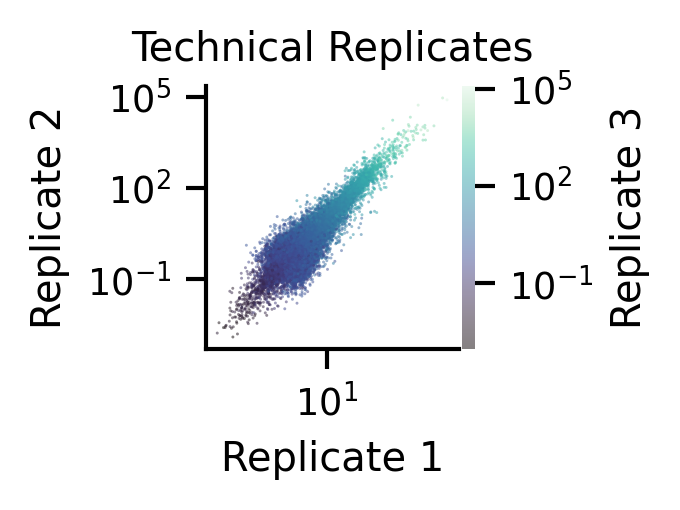

In [95]:
sns.set_context('paper')

x = df_pivot['1']
y = df_pivot['2']
c = df_pivot['3']

plt.figure(figsize=(2,1.5), dpi=300)
hb = plt.scatter(
    x, y, c=c, cmap='mako', s=0.5, alpha=0.5, norm=LogNorm(vmin=c.min(), vmax=c.max()), edgecolors='none'
)

plt.title("Technical Replicates")
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Replicate 1')
plt.ylabel('Replicate 2')
sns.despine()

# Create colorbar and customize
cbar = plt.colorbar(hb, pad = 0.01)
cbar.set_label('Replicate 3')  # rotation 0, labelpad adjusts distance
cbar.outline.set_visible(False)

plt.savefig("grant_resub_figs/fig4_option_1.png", dpi=300, bbox_inches="tight")
plt.tight_layout(pad = 0)
plt.show()


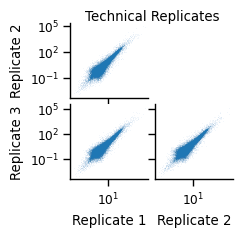

In [96]:
# Rename columns for labeling
df_plot = df_pivot[["1", "2", "3"]].rename(columns={
    "1": "Replicate 1",
    "2": "Replicate 2",
    "3": "Replicate 3"
})

sns.set_context('paper')

# Create PairGrid manually
g = sns.PairGrid(df_plot, corner=True, height=1, aspect=1)

# Map scatterplots to lower triangle
g.map_lower(sns.scatterplot, s=0.25, alpha=0.1, edgecolor=None)

# Set log scale for all lower-triangle axes
for ax in g.axes.flatten():
    if ax is not None:
        ax.set_xscale('log')
        ax.set_yscale('log')

# Hide diagonal axes
for i, j in zip(*np.diag_indices_from(g.axes)):
    g.axes[i, j].set_visible(False)

# Add a title
g.fig.suptitle("Technical Replicates", fontsize='medium', y = 0.725, x = 0.45)

# Adjust layout
g.fig.tight_layout(pad=0)
g.fig.savefig("grant_resub_figs/fig4_option_2.png", dpi=300, bbox_inches="tight")

plt.show()


# Figure 5: Multiple BCs

In [320]:
# Per AD timepoint and sample, what is the standard deviation between AD BCs?
AD_BCs_agg = concatenated_df[["AD", "Ratio_negCTRLnorm", "Time", "sample"]].groupby(["AD", "Time", "sample"]).agg([np.mean, np.std, "count"]).reset_index()#.dropna()
AD_BCs_agg.columns = ["AD", "Time", "sample", "mean", "std", "BC_count"]
AD_BCs_agg["Relative Std. Dev."] = AD_BCs_agg["std"] / AD_BCs_agg["mean"]
AD_BCs_agg

,AD,Time,sample,mean,std,BC_count,Relative Std. Dev.
0,AAACAAAGAGCTACTCCATTGACTCCAGTTGTTCCAGAATCTGATG...,0,1,1.582093,NaN,1,NaN
1,AAACAAAGAGCTACTCCATTGACTCCAGTTGTTCCAGAATCTGATG...,0,2,0.921957,NaN,1,NaN
2,AAACAAAGAGCTACTCCATTGACTCCAGTTGTTCCAGAATCTGATG...,0,3,1.258584,NaN,1,NaN
3,AAACAAAGAGCTACTCCATTGACTCCAGTTGTTCCAGAATCTGATG...,10,1,1.289787,NaN,1,NaN
4,AAACAAAGAGCTACTCCATTGACTCCAGTTGTTCCAGAATCTGATG...,10,2,1.002675,NaN,1,NaN
...,...,...,...,...,...,...,...
231124,TTTGTTTCTGGTACTGTTTCTCCTAAAGATTTGCATGTTGATACTG...,30,2,7.493609,10.523603,2,1.404344
231125,TTTGTTTCTGGTACTGTTTCTCCTAAAGATTTGCATGTTGATACTG...,30,3,8.934322,12.525078,2,1.401906
231126,TTTGTTTCTGGTACTGTTTCTCCTAAAGATTTGCATGTTGATACTG...,5,1,7.713425,NaN,1,NaN
231127,TTTGTTTCTGGTACTGTTTCTCCTAAAGATTTGCATGTTGATACTG...,5,2,4.285752,NaN,1,NaN


In [325]:
# 37% of set has multiple BCs
len(AD_BCs_agg[AD_BCs_agg["Relative Std. Dev."].isna()]) / len(AD_BCs_agg)

0.635818092926461

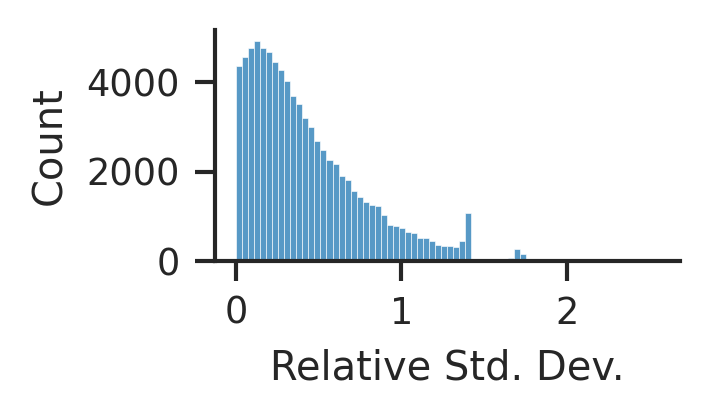

In [321]:
# For ADs with multiple BCs
plt.figure(dpi = 300, figsize = (2,1))
ax = sns.histplot(AD_BCs_agg['Relative Std. Dev.'], bins = 70)
sns.despine()

In [326]:
from Bio.Seq import Seq
qcdf["AAseq"] = qcdf["Tile"].apply(lambda seq: str(Seq(seq).translate()))
qcdf

,Tile,AD_BC,RPTR_BC,RPTR_UMIs,AD_UMIs,Ratio_negCTRLnorm,Time,sample,Name,is_control,GFP_mean,mCherry_mean,Activity_SCglucose,AAseq,BC_count
0,GGTACTATTTCTCCTAAAGATTTGATGATGGATGCTTCTGTTCCAC...,ACTCGGAATTG,TATACATCCACCAT,402,646,5.651387,5,3,Eurotiomycetes_jgi|Penatra1|67166|gm1.1253_g_256,experimental,2550.414931,3813.713778,71546.924661,GTISPKDLMMDASVPPSGTFTDLSTPSFESPGNFSQNTSP,3
1,ATGTTTACTGATTTGGATGTTGCTGGTCATGAAGATTGGCCATCTT...,AAGTTCTTTCA,CTATTCCGAAATAT,1012,167,55.033299,5,3,Eurotiomycetes_jgi|Penatra1|67166|gm1.1253_g_296,experimental,8798.171241,1017.694945,261940.998463,MFTDLDVAGHEDWPSLFDHSSEPLNAFDLATLDAAAAYSV,3
2,TTGGATTTGGATGACTTTACTGGATTTGAAGGTGGTGCTTCTACTA...,TCTTAGGCTCG,AAAGTTCTCAGACA,690,917,6.833470,5,3,Sordariomycetes_jgi|Colac2|683025|estExt_Genew...,experimental,3248.307011,2321.034628,102890.752186,LDLDDFTGFEGGASTTYSSPAMPSVFDVGPTLGTVSPQDL,2
3,CAAAGACCAACTAGACCACAAGTTCCATTGTTCTCTCAATCTACTG...,GCCCTTGTATT,TTAGTATTTTATCT,140,533,2.385406,5,3,Leotiomycetes_jgi|Rhier1|657659|fgenesh1_pg.13...,experimental,1762.120378,2637.450831,46665.516224,QRPTRPQVPLFSQSTGNIPQTPNMAMQGNLLYALSLAEAG,2
4,TTGTTTATGGATGCTTCTGCTCCACCATCTGCTTCATTTACTGATT...,GCTCGTTACCG,AAAAACTAATTCTA,459,111,37.553569,5,3,Eurotiomycetes_jgi|Aspind2_1|119317|CE119316_2...,experimental,5148.434170,2383.548911,161936.816547,LFMDASAPPSASFTDLSTPSFDSPGYFSQDTSPMFGTDLD,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124122,GCTAGATCTGTTACTAAACCATCTCATGTTGCTGGTGTTAATGCTA...,TTCAACCTGCT,AACGAATAAAACAA,109,379,0.725170,240,1,Afla_EED46972.1_AspergillusFlavusNRRL3357_131,experimental,270.500000,1081.691640,51021.993644,ARSVTKPSHVAGVNARQRKPLPPIKFDSQDPVAMKRARNT,1
124123,CCAAAATCTGGTTCTAGGAAACATTCTTCTGTTGCTGGTGTTAATT...,TGATGTACGGT,TGTTAGGTGATAAC,22,148,0.374812,240,1,Xylonomycetes_jgi|Trigu1|1045435|fgenesh1_pg.2...,experimental,370.737233,2473.781472,23650.129864,PKSGSRKHSSVAGVNSRRRDKPLPPIVVDDPSDLIAVKRA,3
124124,GGTTCTTCTGGTGAATATGATGTTGCTGGTTCTCAATGGTTCTCTT...,ACCGCGGGCCG,ATAATACGTGTACA,11,5,5.547214,240,1,Sordariomycetes_jgi|Verdah1|362640|estExt_Gene...,experimental,2594.613575,3341.401808,46857.078856,GSSGEYDVAGSQWFSLFPDQNASVETTGAEQPLGDRVQNS,3
124125,GTTACTACTACTTCTTCTTCTTCTAGAAGGAAATCTGGTGGTTCTC...,CTTCCCTCCCT,CGCCACTCACCACT,30,63,1.200696,240,1,Sordariomycetes_jgi|Acral2|2034848|fgenesh1_kg...,experimental,270.500000,3068.675866,29693.319420,VTTTSSSSRRKSGGSPASGRHSSVAGVGSRKRDKPLPPII,2


In [336]:
qcdf["is_control"].value_counts()

is_control
experimental    121894
high               828
low                735
mid                670
Name: count, dtype: int64

In [427]:
qcdf_high_controls = qcdf[qcdf["is_control"] == "high"]
qcdf_high_controls

,Tile,AD_BC,RPTR_BC,RPTR_UMIs,AD_UMIs,Ratio_negCTRLnorm,Time,sample,Name,is_control,GFP_mean,mCherry_mean,Activity_SCglucose,AAseq,BC_count
547,TCTACTGATTATACTCCAATGTTTGAATATGAAACTTATGAAGATA...,ATAAACACAGG,TATTTCCACTCAAT,1985,200,90.134701,5,3,Gnc4Lib_Disorder_HIGH_0,high,8923.0,1498.397363,261410.705323,STDYTPMFEYETYEDNFKEWTSLFDNDIPVTTDDVSLADR,2
548,TCTACTGATTATACTCCAATGTTTGAATATGAAACTTATGAAGATA...,ATAAACACAGG,TATTTCCACTCAAT,1985,200,90.134701,5,3,Gnc4Lib_Disorder_HIGH_0,high,8923.0,1498.397363,261410.705323,STDYTPMFEYETYEDNFKEWTSLFDNDIPVTTDDVSLADR,2
549,TCTACTGATTATACTCCAATGTTTGAATATGAAACTTATGAAGATA...,ATAAACACAGG,TATTTCCACTCAAT,1985,200,90.134701,5,3,Gnc4Lib_Disorder_HIGH_0,high,8923.0,1498.397363,261410.705323,STDYTPMFEYETYEDNFKEWTSLFDNDIPVTTDDVSLADR,2
550,TCTACTGATTATACTCCAATGTTTGAATATGAAACTTATGAAGATA...,ATAAACACAGG,TATTTCCACTCAAT,1985,200,90.134701,5,3,Gnc4Lib_Disorder_HIGH_0,high,8923.0,1498.397363,261410.705323,STDYTPMFEYETYEDNFKEWTSLFDNDIPVTTDDVSLADR,2
977,TCTACTGATTATACTCCAATGTTTGAATATGAAACTTATGAAGATA...,ATAAACACAGG,AATTTCCACTCAAT,3,200,0.136224,5,3,Gnc4Lib_Disorder_HIGH_0,high,8923.0,1498.397363,261410.705323,STDYTPMFEYETYEDNFKEWTSLFDNDIPVTTDDVSLADR,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123404,ACTGACTTTATTGATGAAGAAGTCTTGATGTCTTTGGTTATTGAAA...,ACCTCCGTGTG,TCTGAGTCCAAATC,8658,541,40.352698,240,1,CITED2_0,high,8923.0,712.187215,262003.249427,TDFIDEEVLMSLVIEMGLDRIKELPELWLGQNEFDFMTDF,3
123443,TCTACTGATTATACTCCAATGTTTGAATATGAAACTTATGAAGATA...,ATCGATTACTA,AACCTAATCTCTTA,16100,1162,34.935906,240,1,Gnc4Lib_Disorder_HIGH_0,high,8923.0,1498.397363,261410.705323,STDYTPMFEYETYEDNFKEWTSLFDNDIPVTTDDVSLADR,2
123444,TCTACTGATTATACTCCAATGTTTGAATATGAAACTTATGAAGATA...,ATCGATTACTA,AACCTAATCTCTTA,16100,1162,34.935906,240,1,Gnc4Lib_Disorder_HIGH_0,high,8923.0,1498.397363,261410.705323,STDYTPMFEYETYEDNFKEWTSLFDNDIPVTTDDVSLADR,2
123445,TCTACTGATTATACTCCAATGTTTGAATATGAAACTTATGAAGATA...,ATCGATTACTA,AACCTAATCTCTTA,16100,1162,34.935906,240,1,Gnc4Lib_Disorder_HIGH_0,high,8923.0,1498.397363,261410.705323,STDYTPMFEYETYEDNFKEWTSLFDNDIPVTTDDVSLADR,2


In [428]:
bc_counts = qcdf_high_controls[["Tile", "Name", "AD_BC"]].drop_duplicates().groupby(["Tile", "Name"]).count().rename(columns = {"AD_BC" : "BC_count"}).reset_index()
bc_counts

,Tile,Name,BC_count
0,ACTGACTTTATTGATGAAGAAGTCTTGATGTCTTTGGTTATTGAAA...,CITED2_0,3
1,ACTGATGCTATTGATGAAGAAGTCTTGATGTCTTTGGTTATTGAAA...,CITED2_ARO2A_0,2
2,ATGACTGATTCTACTCCAATGTTTGAATATGAATTGACTGAGAATA...,Gnc4Lib_Disorder_HIGH_0,3
3,GATGAACCAGCTATGTTGTTTGATACTTCTAATTCTTCTGTTGTTG...,Gnc4Lib_Kappa_HIGH_0,1
4,GATGATGCTGTTGTTGAATCATTCTTCTCTTCTTCTACTGATTCTA...,GCN4alt_0,1
5,GATTCTCCAGGTCCAGGATTTACTCCACATGATTCTGCTCCATATG...,VP16C_L2I_0,1
6,GCTAAAGTTGATACTGAAGAAGAAGATAAGACTATGGTTGATTCTA...,Gnc4Lib_Kappa_HIGH_0,1
7,TCTACTGATTATACTCCAATGTTTGAATATGAAACTTATGAAGATA...,Gnc4Lib_Disorder_HIGH_0,2
8,TCTACTGATTCTACTCCAATGTTTGATTATGATAATTTGGAAGATA...,Gnc4Lib_HoldChargeDisorder_LOW_0,2
9,TTGACTGCTTTGACTTCTCCATCTTTGTTTGATGGTTCTCCAGACT...,Gnc4Lib_ChopOrthologs_HIGH_0,5


In [431]:
ad_df = qcdf[qcdf["Name"] == "CITED2_0"]

# group by tile, time, and sample
ad_df = (
    ad_df.groupby(["Name", "Activity_SCglucose", "AD_BC", "Tile", "Time"])["Ratio_negCTRLnorm"]
      .agg(["mean", "std"])
      .reset_index()
)

# ensure Time is numeric
ad_df["Time"] = pd.to_numeric(ad_df["Time"], errors="coerce")
ad_df = ad_df.sort_values(["Name", "Time"])
ad_df

,Name,Activity_SCglucose,AD_BC,Tile,Time,mean,std
0,CITED2_0,262003.249427,ACCTCCGTGTG,ACTGACTTTATTGATGAAGAAGTCTTGATGTCTTTGGTTATTGAAA...,0,2.139141,0.768288
7,CITED2_0,262003.249427,ATTCGTGCGAG,ACTGACTTTATTGATGAAGAAGTCTTGATGTCTTTGGTTATTGAAA...,0,2.967470,1.275882
14,CITED2_0,262003.249427,CCCGCTAACAC,ACTGACTTTATTGATGAAGAAGTCTTGATGTCTTTGGTTATTGAAA...,0,2.228605,0.248756
6,CITED2_0,262003.249427,ACCTCCGTGTG,ACTGACTTTATTGATGAAGAAGTCTTGATGTCTTTGGTTATTGAAA...,5,47.338817,6.057514
13,CITED2_0,262003.249427,ATTCGTGCGAG,ACTGACTTTATTGATGAAGAAGTCTTGATGTCTTTGGTTATTGAAA...,5,61.239606,15.865279
20,CITED2_0,262003.249427,CCCGCTAACAC,ACTGACTTTATTGATGAAGAAGTCTTGATGTCTTTGGTTATTGAAA...,5,50.276500,3.557726
1,CITED2_0,262003.249427,ACCTCCGTGTG,ACTGACTTTATTGATGAAGAAGTCTTGATGTCTTTGGTTATTGAAA...,10,116.052453,2.906558
8,CITED2_0,262003.249427,ATTCGTGCGAG,ACTGACTTTATTGATGAAGAAGTCTTGATGTCTTTGGTTATTGAAA...,10,153.776587,19.425848
15,CITED2_0,262003.249427,CCCGCTAACAC,ACTGACTTTATTGATGAAGAAGTCTTGATGTCTTTGGTTATTGAAA...,10,119.769950,7.809636
2,CITED2_0,262003.249427,ACCTCCGTGTG,ACTGACTTTATTGATGAAGAAGTCTTGATGTCTTTGGTTATTGAAA...,15,152.848453,10.209948


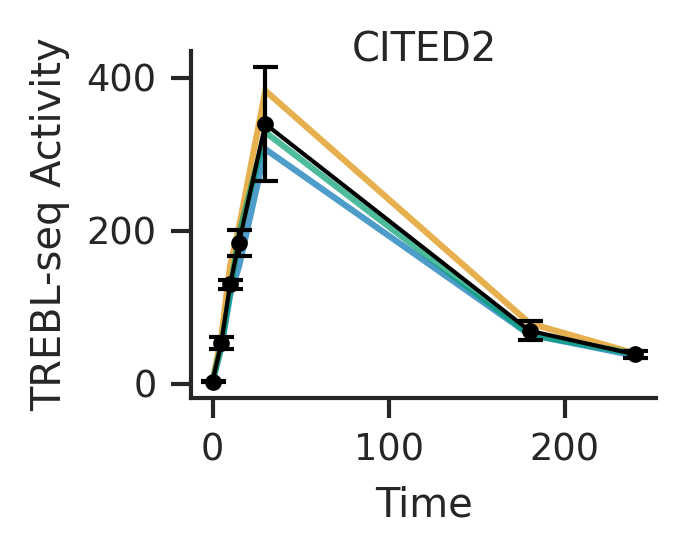

In [457]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a single figure and axis
fig, ax = plt.subplots(figsize=(2,1.5), dpi=300)

# Create palette
names = ad_df["AD_BC"].unique()
palette_dict = dict(zip(names, sns.color_palette("colorblind", n_colors=len(names))))

# Line plot
sns.lineplot(
    data=ad_df,
    x="Time",
    y="mean",
    hue="AD_BC",
    linewidth=1.5,
    legend=False,
    palette=palette_dict,
    alpha=0.7,
    ax=ax
)

# Your two series
means = final_means_cat.loc[ad_df["Tile"].iloc[0]]
stds = std_devs_cat.loc[ad_df["Tile"].iloc[0]]

# Keep only numeric time indices
means_numeric = means[means.index.to_series().apply(lambda x: str(x).isdigit())]
stds_numeric = stds[stds.index.to_series().apply(lambda x: str(x).isdigit())]

# Convert to int/float
means_numeric.index = means_numeric.index.astype(int)
stds_numeric.index = stds_numeric.index.astype(int)
means_numeric = means_numeric.astype(float)
stds_numeric = stds_numeric.astype(float)

# Align on common timepoints
df = pd.DataFrame({"mean": means_numeric, "std": stds_numeric}).sort_index()

# Add error bars (overlay on same ax)
ax.errorbar(
    df.index,
    df["mean"],
    yerr=df["std"],
    fmt="-o",
    capsize=3,
    linewidth=1,
    markersize=3,
    color="black"  # or pick from palette_dict if you want it matching
)

# Labels and style
ax.set_ylabel("TREBL-seq Activity")
ax.set_title("CITED2", y=0.9)
sns.despine()

plt.savefig("grant_resub_figs/fig5.png", bbox_inches="tight")
plt.show()

# Figure 6: allelic series

In [468]:
gcn4_design = pd.read_csv("Gcn4Array_Design.csv")
gcn4_design_vars = gcn4_design[(gcn4_design["Name"].str.contains("GCN4alt"))].drop_duplicates(subset = "ADseq")
gcn4_design_vars

,Unnamed: 0,ADseq,Name,ArrayDNA
20687,8,DDAVVESFFSSSTDSTPMFEYENLEDNSKEWTSLFDNDIP,GCN4alt_0,GATGATGCTGTTGTTGAATCATTCTTCTCTTCTTCTACTGATTCTA...
20688,9,DDAVVESAASSSTDSTPMFEYENLEDNSKEWTSLFDNDIP,GCN4alt_FF_AA_0,GATGATGCTGTTGTTGAATCTGCTGCTTCTTCTTCTACTGATTCTA...
20689,10,DDAVVESFFSSSTDSTPAAEAENAEDNSKEWTSLFDNDIP,GCN4alt_MFYL_A_0,GATGATGCTGTTGTTGAATCATTCTTCTCTTCTTCTACTGATTCTA...
20690,11,DDAVVESFFSSSTDSTPMFEYENLEDNSKEATSAADNDIP,GCN4alt_WLF_A_0,GATGATGCTGTTGTTGAATCATTCTTCTCTTCTTCTACTGATTCTA...
20691,12,DDAVVESAASSSTDSTPAAEAENAEDNSKEATSAADNDIP,GCN4alt_ALLAS_0,GATGATGCTGTTGTTGAATCTGCTGCTTCTTCTTCTACTGATTCTA...
20692,13,DDAVVESAASSSTDSTPMAEAENLEDNSKEATSLADNDIP,GCN4alt_ARO_A_0,GATGATGCTGTTGTTGAATCTGCTGCTTCTTCTTCTACTGATTCTA...
20693,14,DDAVVESFFSSSTDSTPMFEYENAEDNSKEWTSAFDNDIP,GCN4alt_L_A_0,GATGATGCTGTTGTTGAATCATTCTTCTCTTCTTCTACTGATTCTA...


In [469]:
# names = ["GCN4alt_0", "GCN4alt_FF_AA_0", "GCN4alt_MFYL_A_0", "GCN4alt_WLF_A_0", "GCN4alt_ARO_A_0"]

In [470]:
gcn4_comparison = qcdf[qcdf["Name"].isin(gcn4_design_vars["Name"])]
gcn4_comparison

,Tile,AD_BC,RPTR_BC,RPTR_UMIs,AD_UMIs,Ratio_negCTRLnorm,Time,sample,Name,is_control,GFP_mean,mCherry_mean,Activity_SCglucose,AAseq,BC_count
173,GATGATGCTGTTGTTGAATCATTCTTCTCTTCTTCTACTGATTCTA...,ATTTTTGGATT,TAAGTTGCCTGTAG,165,479,3.128311,5,3,GCN4alt_WLF_A_0,low,2497.083969,3447.610479,32126.202553,DDAVVESFFSSSTDSTPMFEYENLEDNSKEATSAADNDIP,1
2303,GATGATGCTGTTGTTGAATCATTCTTCTCTTCTTCTACTGATTCTA...,GTCACCTTTTG,CAACTATACATACC,3412,373,83.073345,5,3,GCN4alt_0,high,8606.639029,3138.089823,258453.390222,DDAVVESFFSSSTDSTPMFEYENLEDNSKEWTSLFDNDIP,1
4540,GATGATGCTGTTGTTGAATCTGCTGCTTCTTCTTCTACTGATTCTA...,GATACCTTAGA,TCGAACCATTCATT,120,1586,0.687131,5,3,GCN4alt_ARO_A_0,low,270.500000,3714.398437,13761.263345,DDAVVESAASSSTDSTPMAEAENLEDNSKEATSLADNDIP,1
6924,GATGATGCTGTTGTTGAATCATTCTTCTCTTCTTCTACTGATTCTA...,ATTTTTGGATT,TAAGTTGCCTGTAG,156,634,2.646424,5,1,GCN4alt_WLF_A_0,low,2497.083969,3447.610479,32126.202553,DDAVVESFFSSSTDSTPMFEYENLEDNSKEATSAADNDIP,1
8259,GATGATGCTGTTGTTGAATCTGCTGCTTCTTCTTCTACTGATTCTA...,CACGTACACGC,TGATACACATACGC,4,9,4.780151,5,1,GCN4alt_ALLAS_0,low,1071.166774,3806.941849,15400.437967,DDAVVESAASSSTDSTPAAEAENAEDNSKEATSAADNDIP,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116620,GATGATGCTGTTGTTGAATCTGCTGCTTCTTCTTCTACTGATTCTA...,GATACCTTAGA,TCGAACCATTCATT,249,1595,0.447872,180,2,GCN4alt_ARO_A_0,low,270.500000,3714.398437,13761.263345,DDAVVESAASSSTDSTPMAEAENLEDNSKEATSLADNDIP,1
118243,GATGATGCTGTTGTTGAATCATTCTTCTCTTCTTCTACTGATTCTA...,ATTTTTGGATT,TAAGTTGCCTGTAG,944,720,3.305916,240,1,GCN4alt_WLF_A_0,low,2497.083969,3447.610479,32126.202553,DDAVVESFFSSSTDSTPMFEYENLEDNSKEATSAADNDIP,1
118666,GATGATGCTGTTGTTGAATCTGCTGCTTCTTCTTCTACTGATTCTA...,CACGTACACGC,TGATACACATACGC,4,7,1.440835,240,1,GCN4alt_ALLAS_0,low,1071.166774,3806.941849,15400.437967,DDAVVESAASSSTDSTPAAEAENAEDNSKEATSAADNDIP,1
119974,GATGATGCTGTTGTTGAATCATTCTTCTCTTCTTCTACTGATTCTA...,GTCACCTTTTG,CAACTATACATACC,4118,556,18.675138,240,1,GCN4alt_0,high,8606.639029,3138.089823,258453.390222,DDAVVESFFSSSTDSTPMFEYENLEDNSKEWTSLFDNDIP,1


In [471]:
# group by tile, time, and sample
agg_df = (
    gcn4_comparison.groupby(["Name", "Activity_SCglucose", "Tile", "Time"])["Ratio_negCTRLnorm"]
      .agg(["mean", "std"])
      .reset_index()
)
agg_df

,Name,Activity_SCglucose,Tile,Time,mean,std
0,GCN4alt_0,258453.390222,GATGATGCTGTTGTTGAATCATTCTTCTCTTCTTCTACTGATTCTA...,0,4.315016,0.480951
1,GCN4alt_0,258453.390222,GATGATGCTGTTGTTGAATCATTCTTCTCTTCTTCTACTGATTCTA...,10,126.247939,15.041298
2,GCN4alt_0,258453.390222,GATGATGCTGTTGTTGAATCATTCTTCTCTTCTTCTACTGATTCTA...,15,182.989983,12.723474
3,GCN4alt_0,258453.390222,GATGATGCTGTTGTTGAATCATTCTTCTCTTCTTCTACTGATTCTA...,180,29.130946,6.388928
4,GCN4alt_0,258453.390222,GATGATGCTGTTGTTGAATCATTCTTCTCTTCTTCTACTGATTCTA...,240,16.771738,3.940558
5,GCN4alt_0,258453.390222,GATGATGCTGTTGTTGAATCATTCTTCTCTTCTTCTACTGATTCTA...,30,256.456633,35.633499
6,GCN4alt_0,258453.390222,GATGATGCTGTTGTTGAATCATTCTTCTCTTCTTCTACTGATTCTA...,5,74.563962,9.300250
7,GCN4alt_ALLAS_0,15400.437967,GATGATGCTGTTGTTGAATCTGCTGCTTCTTCTTCTACTGATTCTA...,10,0.817347,0.673331
8,GCN4alt_ALLAS_0,15400.437967,GATGATGCTGTTGTTGAATCTGCTGCTTCTTCTTCTACTGATTCTA...,15,8.277956,NaN
9,GCN4alt_ALLAS_0,15400.437967,GATGATGCTGTTGTTGAATCTGCTGCTTCTTCTTCTACTGATTCTA...,180,4.144226,2.149016


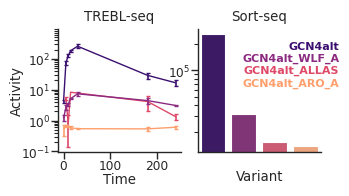

In [472]:
sns.set_style('ticks')
# ensure Time is numeric
agg_df["Time"] = pd.to_numeric(agg_df["Time"], errors="coerce")
agg_df = agg_df.sort_values(["Name", "Time"])

# ----- create palette ordered by decreasing activity -----
# get mean activity for each Name (or first measurement, as in your bar plot)
activity_order = agg_df.groupby("Name")["Activity_SCglucose"].first().sort_values(ascending=False)
names_sorted = activity_order.index.tolist()

# create palette in the same order
palette = dict(zip(names_sorted, sns.color_palette("magma", n_colors=len(names_sorted))))


# create figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(3,1.5))

# ----- subplot 1: line plot with error bars -----
ax = axes[0]
sns.lineplot(
    data=agg_df,
    x="Time",
    y="mean",
    hue="Name",
    linewidth=1,
    ax=ax,
    legend=False,         # remove legend here
    markeredgecolor=None, # remove marker edge
    palette=palette
)

# add error bars
for name, sub in agg_df.groupby("Name"):
    ax.errorbar(
        sub["Time"],
        sub["mean"],
        yerr=sub["std"],
        fmt="none",
        capsize=1.5,
        color=palette[name]
    )

ax.set_yscale("log")
ax.set_xlabel("Time", labelpad = 0)
ax.set_ylabel("Activity", labelpad = -2)
ax.tick_params(axis='both')
sns.despine(ax=ax)
ax.set_title("TREBL-seq")

# ----- subplot 2: bar plot sorted decreasing -----
ax2 = axes[1]
activity_df = agg_df.groupby("Name")["Activity_SCglucose"].first().sort_values(ascending=False).reset_index()

sns.barplot(
    data=activity_df,
    x="Name",
    y="Activity_SCglucose",
    ax=ax2,
    palette={name: palette[name] for name in activity_df["Name"]},
    dodge=False
)

ax2.set_yscale("log")
ax2.set_xlabel("Variant",labelpad = 13)
ax2.set_ylabel("")
ax2.tick_params(axis='y')
ax2.set_xticks([])  # hide x-axis ticks since we have legend text
sns.despine(ax=ax2)
ax2.set_title("Sort-seq")

# ----- custom legend as colored text (top-right of ax2) -----
for i, name in enumerate(activity_df["Name"]):
    ax2.text(
        1.15, 0.9 - i*0.1,     # x slightly outside, y decreasing
        name[:-2],
        color=palette[name],
        transform=ax2.transAxes,
        fontsize='small',
        va='top',
        ha = 'right',
        fontweight = 'bold'
    )

ax.set_ylim(None, 950)

# Subplot 1: line plot
ax.tick_params(axis='x', pad=0.5)  # bring x-axis labels closer
ax.tick_params(axis='y', pad=0.5)  # bring y-axis labels closer

# Subplot 2: bar plot
ax2.tick_params(axis='y', pad=0.5)  # y-axis only, x labels hidden

plt.tight_layout(pad = -1)
plt.savefig("grant_resub_figs/fig6.png", dpi=300, bbox_inches="tight")
plt.show()

# Figure 7: Sort-seq vs TREBL-seq

In [126]:
# read in facs csv with activity data and control designation (EC did by hand in excel)
facs_f='/global/scratch/projects/fc_mvslab/OpenProjects/EChase/TREBLEseq_ismaybethenewcibername/TREBLseq_finaldrafts/Gcn4OrthologData_ToShare_20240930_EC.csv'
facsdf_qc = pd.read_csv(facs_f, usecols=['Name','ArrayDNA','is_control',
                                         'Activity_SCglucose', 'TotalReads_BioRepA_BYS4', 'TotalReads_BioRepB_BYS4',
                                         'BioRep_A_mCherry','BioRep_A_mCherry_TotalReads','BioRep_B_mCherry','BioRep_B_mCherry_TotalReads', #mCherry 4 bin sorts
                                        'BioRep_A_GFP', 'BioRep_A_GFP_TotalReads','BioRep_B_GFP', 'BioRep_B_GFP_TotalReads', #GFP 4 bin sorts -- one of the replicates is very messed up
                                        ])
facsdf_qc['GFP_mean']=facsdf_qc[['BioRep_A_GFP','BioRep_B_GFP']].mean(axis=1)
facsdf_qc['mCherry_mean']=facsdf_qc[['BioRep_A_mCherry','BioRep_B_mCherry']].mean(axis=1)
facsdf_qc = facsdf_qc[(
    facsdf_qc['BioRep_A_mCherry_TotalReads']>=50) & (facsdf_qc['BioRep_B_mCherry_TotalReads']>=50) &(
        facsdf_qc['BioRep_A_GFP_TotalReads']>=50) & (facsdf_qc['BioRep_B_GFP_TotalReads']>=50)
    ]
facsdf_qc = facsdf_qc[(facsdf_qc['TotalReads_BioRepA_BYS4']>=1000) & (facsdf_qc['TotalReads_BioRepB_BYS4']>=1000) ]
facsdf_qc

,Name,is_control,ArrayDNA,TotalReads_BioRepA_BYS4,TotalReads_BioRepB_BYS4,BioRep_A_GFP_TotalReads,BioRep_A_GFP,BioRep_B_GFP_TotalReads,BioRep_B_GFP,BioRep_A_mCherry_TotalReads,BioRep_A_mCherry,BioRep_B_mCherry_TotalReads,BioRep_B_mCherry,Activity_SCglucose,GFP_mean,mCherry_mean
7,Sordariomycetes_jgi|Acral2|2019554|gm1.4974_g_36,experimental,GCTTCTGGTCAAGCTAATGCTAATTATCAAGCATTTACTGCTGGTT...,37745.0,27242.0,555.0,1069.575624,294.0,256.000000,1301.0,1914.455499,819.0,2495.171715,31637.986095,662.787812,2204.813607
8,Sordariomycetes_jgi|Acral2|2019554|gm1.4974_g_41,experimental,AATGCTAATTATCAAGCATTTACTGCTGGTTCTGCTTTGAATGGTC...,54447.0,34378.0,521.0,648.717628,569.0,268.428420,2706.0,1863.229267,716.0,1873.407563,35182.012737,458.573024,1868.318415
9,Sordariomycetes_jgi|Acral2|2019554|gm1.4974_g_46,experimental,GCATTTACTGCTGGTTCTGCTTTGAATGGTCCATCTTTGCCAGCTC...,53756.0,5256.0,784.0,1186.811484,64.0,256.000000,2109.0,1028.931403,80.0,855.631328,65569.941168,721.405742,942.281366
10,Sordariomycetes_jgi|Acral2|2019554|gm1.4974_g_51,experimental,TCTGCTTTGAATGGTCCATCTTTGCCAGCTCCATCTTTGTTTGCTG...,6275.0,86566.0,58.0,2912.584135,1438.0,598.087653,333.0,596.539632,4863.0,1520.385633,41694.074991,1755.335894,1058.462632
11,Sordariomycetes_jgi|Acral2|2019554|gm1.4974_g_56,experimental,CCATCTTTGCCAGCTCCATCTTTGTTTGCTGGTCATGGTCCAGAAG...,19935.0,4774.0,479.0,361.582465,141.0,256.000000,1673.0,3213.641420,524.0,3169.107634,18947.873984,308.791233,3191.374527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20813,Gnc4Lib_Disorder_HIGH_0,high,TCTACTGATTATACTCCAATGTTTGAATATGAAACTTATGAAGATA...,3225.0,23456.0,414.0,8782.000000,2446.0,9064.000000,94.0,1664.822094,479.0,1331.972632,261410.705323,8923.000000,1498.397363
20814,Gnc4Lib_Disorder_HIGH_0,high,ATGACTGATTCTACTCCAATGTTTGAATATGAATTGACTGAGAATA...,64713.0,46036.0,10295.0,4506.455793,8034.0,5156.528478,2549.0,3124.915008,1258.0,2875.423105,152798.870307,4831.492136,3000.169056
20818,Gnc4Lib_Charge_HIGH_0,mid,TCTACTGATTCTACTCCAATGTTTGAATATCAGAATTTGGAGAATA...,4430.0,53110.0,452.0,3363.151895,7755.0,3243.398807,124.0,1860.267447,2115.0,1947.655400,113197.558297,3303.275351,1903.961424
20820,Gnc4Lib_Disorder_HIGH_0,high,TCTACTGATTATACTCCAATGTTTGAATATGAAACTTATGAAGATA...,3225.0,23456.0,414.0,8782.000000,2446.0,9064.000000,94.0,1664.822094,479.0,1331.972632,261410.705323,8923.000000,1498.397363


In [127]:
# inner join the df's 
qcdf = pd.merge(concatenated_df[['Tile', 'AD_BC', 'RPTR_BC', 
                                 'RPTR_UMIs', 'AD_UMIs',
                                 'Ratio_negCTRLnorm', 'Time','sample'
                                ]], 
                facsdf_qc[['Name', 'ArrayDNA', 'is_control',
                                           'GFP_mean', 'mCherry_mean', 'Activity_SCglucose']],
                   left_on = 'Tile', right_on = 'ArrayDNA',
                   how= 'inner')
qcdf = qcdf.drop(columns=['ArrayDNA', ])
qcdf.head()

,Tile,AD_BC,RPTR_BC,RPTR_UMIs,AD_UMIs,Ratio_negCTRLnorm,Time,sample,Name,is_control,GFP_mean,mCherry_mean,Activity_SCglucose
0,GGTACTATTTCTCCTAAAGATTTGATGATGGATGCTTCTGTTCCAC...,ACTCGGAATTG,TATACATCCACCAT,402,646,5.651387,5,3,Eurotiomycetes_jgi|Penatra1|67166|gm1.1253_g_256,experimental,2550.414931,3813.713778,71546.924661
1,ATGTTTACTGATTTGGATGTTGCTGGTCATGAAGATTGGCCATCTT...,AAGTTCTTTCA,CTATTCCGAAATAT,1012,167,55.033299,5,3,Eurotiomycetes_jgi|Penatra1|67166|gm1.1253_g_296,experimental,8798.171241,1017.694945,261940.998463
2,TTGGATTTGGATGACTTTACTGGATTTGAAGGTGGTGCTTCTACTA...,TCTTAGGCTCG,AAAGTTCTCAGACA,690,917,6.833470,5,3,Sordariomycetes_jgi|Colac2|683025|estExt_Genew...,experimental,3248.307011,2321.034628,102890.752186
3,CAAAGACCAACTAGACCACAAGTTCCATTGTTCTCTCAATCTACTG...,GCCCTTGTATT,TTAGTATTTTATCT,140,533,2.385406,5,3,Leotiomycetes_jgi|Rhier1|657659|fgenesh1_pg.13...,experimental,1762.120378,2637.450831,46665.516224
4,TTGTTTATGGATGCTTCTGCTCCACCATCTGCTTCATTTACTGATT...,GCTCGTTACCG,AAAAACTAATTCTA,459,111,37.553569,5,3,Eurotiomycetes_jgi|Aspind2_1|119317|CE119316_2...,experimental,5148.434170,2383.548911,161936.816547


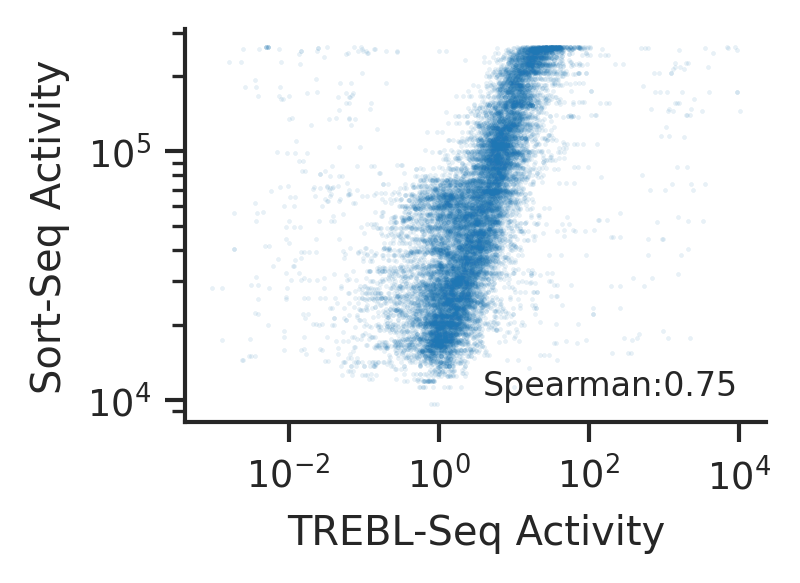

In [158]:
sns.set_context('paper')
sns.set_style('ticks')

qcdf_240 = qcdf[(qcdf['Time']=='240')]


plt.figure(dpi = 300, figsize = (2.5, 1.7))
ax = sns.scatterplot(
    data=qcdf_240,
    x='Ratio_negCTRLnorm',
    y='Activity_SCglucose',
    edgecolor=None,
    alpha=0.1,
    s=1
)
ax.set(xscale="log")
ax.set(yscale="log")

ax.set_xlabel("TREBL-Seq Activity")
ax.set_ylabel("Sort-Seq Activity")
sns.despine()

# Compute correlations
pearson_corr, pearson_p = pearsonr(qcdf_240['Ratio_negCTRLnorm'], qcdf_240['Activity_SCglucose'])
spearman_corr, spearman_p = spearmanr(qcdf_240['Ratio_negCTRLnorm'], qcdf_240['Activity_SCglucose'])

# Annotate in bottom-right corner without a box
textstr = f'Spearman:{spearman_corr:.2f}'
ax.text(
    0.95, 0.05, textstr, transform=ax.transAxes,
    fontsize='small', verticalalignment='bottom', horizontalalignment='right'
)
plt.savefig("grant_resub_figs/fig7.png", dpi=300, bbox_inches="tight")
plt.show()


# Figure 8: Speed vs strength

In [97]:
linear_t_half = kinetics_analysis.analyze_tiles_parallel(final_means_cat.iloc[:, :-4], max_workers = 32)
linear_t_half

 Number of decreasing tiles 0
Increasing dfs:10934
Total dfs:10934


Processing tiles: 100%|██████████| 10934/10934 [00:12<00:00, 892.23it/s]


,Lin_T1/2
Tile,
AAACAAAGAGCTACTCCATTGACTCCAGTTGTTCCAGAATCTGATGATCCAGTTGCTTTGAAGAGAGCTAGAAATACTGAAGCTGCTAGAAGATCTAGAGCTAGGAAATTGGAAAGAATG,-25.298870
AAACAAATGTATATTGGTTCTAATAAACCATTGGGTAAAGATCATAGAGGTTATAATGCTCATAATTGGAAACAATGTGCTATTTACTTTCATATTAGATATCCAAATGTTTCTAATTGT,NaN
AAACAATTGGCTTTGTATTCTAGATCTGGTTTGAGATCTCATTCTACTGATTTGGATTTGGATGACTTTACTGGATTTGAAGGTGGTGCTTCTACTACTTATTCTTCTCCAGCTATGCCA,52.978566
AAACAAGGTAATAAGATGTTCTCTGGTAATTATACTTCTTATCATTTGCCACCACCAAATATGAGATTGCAACCACATGCTGAATTGGATTTGTTGGACTTTGCTACATTTGATGGTGGT,354.085473
AAACAATTGCAAACTAATTCTAATATGTCTGATGATACATTTGCTGGTTTGCCATCTGGTACTGTTTCTCCAACTGATTTGATGTTGGATGCTTCTGCTCCATCTTCTGCTACATTTACT,-42.127227
...,...
TTTGTCTTGTTTCCATCTACTGCTCCAAATCCAGCTACTTCTACTACTAGAAGATCTACTGATTCTGGTCCAGCTACTTCTAGAATTGCTCCAAATCAACATTTGAGACAAACTTATAAT,68.830202
TTTGTTAAACAAGAATCTCCAGCTTTGGCTGAATTGGCTTTGTGTAATGCTAATATTTCTCCAAATTCTGCTTATCAAGAAATTGATTCTGCTATTGTTGATGCATTCTTCTCTTCTTCT,278.250026
TTTGTTATTGGTTCTCAAATTGCTGGTCATGAGAAGATCTTGCAAGATATGATTAGAAATGGTAATGAATTGGGTAATCATGCTATGAGAGATGAACCATCTAGATTCTTGTCTGATGCT,NaN


In [115]:
final_means_cat = pd.merge(final_means_cat, linear_t_half, left_index = True, right_index=True, how = 'left')
final_means_cat

,0,10,15,180,240,30,5,Vmax,Avg_StdDev,Activity,Lin_T1/2
Tile,,,,,,,,,,,
AAACAAAGAGCTACTCCATTGACTCCAGTTGTTCCAGAATCTGATGATCCAGTTGCTTTGAAGAGAGCTAGAAATACTGAAGCTGCTAGAAGATCTAGAGCTAGGAAATTGGAAAGAATG,1.254211,1.062693,1.532920,1.240728,1.206545,1.787659,1.351119,1.787659,0.431083,inactive,-25.298870
AAACAAAGATCTCAACCATTGCAACCAATTATTATTGATGATATTAAAGATGCTGCTGCTTTGAAGAGAGCTAAGAATACTGAAGCTGCTAGAAGATCTAGAGCTAGGAAGATGGAAAGA,1.265805,1.819540,1.700459,2.317024,2.080985,1.885667,2.077828,2.317024,0.356520,inactive,54.857423
AAACAAATGTATATTGGTTCTAATAAACCATTGGGTAAAGATCATAGAGGTTATAATGCTCATAATTGGAAACAATGTGCTATTTACTTTCATATTAGATATCCAAATGTTTCTAATTGT,1.166629,1.000460,0.730895,0.709995,0.732983,0.797948,1.621634,1.621634,0.269212,inactive,NaN
AAACAACCAGATGTTGCTACTTGGGATGCTCATTCTAATAAAGGTCAATGTTTGTTAAATTCTGGTGGTTCTGCTAGACCATTGATTATTTGGTTGCCACATTCTCACTTTAAAGAATAT,1.984682,1.299895,1.467031,1.668606,1.693269,1.947597,0.934068,1.984682,0.981397,inactive,NaN
AAACAAGATAAAGATGATGTTACTTCTGAAGTTGCTGATAGAAGATGTAAATCTACTTCTGATTCTCAAGATGTTTATGATAAACCAGGTGAATCTGAATCTCCAGAAAGAACTGAATAT,0.679833,1.127691,1.071415,1.504457,1.322705,1.427080,0.959878,1.504457,0.396125,inactive,50.130339
...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGATGGTTTGGATGCTGCTTCTTTGGCTATGTTTGATACTCAACAATTGGATAAAGTTCAAGCATTTGTTTCTGGTACTGTTTCTCCTAAAGATTTGCATGTTGATACTGCTCCA,1.124169,18.108378,25.314241,15.885584,11.023455,38.055564,10.208349,38.055564,2.313608,active,30.100009
TTTGTTGCTTCTCCAACATTTAATCATAAATTCTCTTCTTCTAATGCATTTACTACTGAACAAATGAAGACATTTGATCCAGAAGCTGCATTTAATGAATTGTTCTCTCCAGAGTTCTCT,1.676623,30.615512,26.635877,24.434864,17.924639,73.708402,16.050106,73.708402,6.074092,active,-125.240531
TTTGTTGGTGATGGTGATTTGGATCAATCTTTGGCTGCTGATCCATGGTATCCATTGTTTCCAGAATCTGATAAATTGGATCAACCAACTAAAGTTGAACAATCTCCATTGATTATTGAT,1.981525,14.324264,20.019784,19.689651,12.861237,42.340589,6.746955,42.340589,2.990464,active,-343.290575


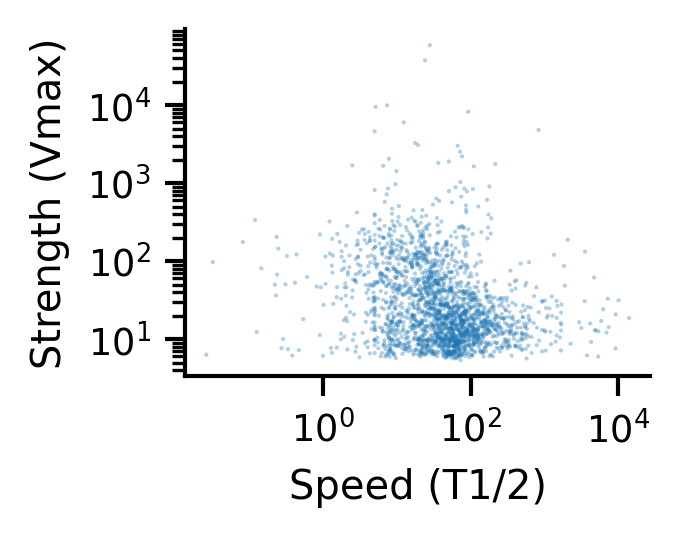

In [124]:
## ACTIVE TILES ONLY
plt.figure(dpi = 300, figsize= (2,1.5))
ax = sns.scatterplot(data=final_means_cat[final_means_cat["Activity"] == "active"], 
                     x = "Lin_T1/2", y = "Vmax", alpha=0.35, s=1, edgecolor = 'none')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel("Speed (T1/2)")
ax.set_ylabel("Strength (Vmax)")
sns.despine()
plt.savefig("grant_resub_figs/fig8.png", dpi=300, bbox_inches="tight")

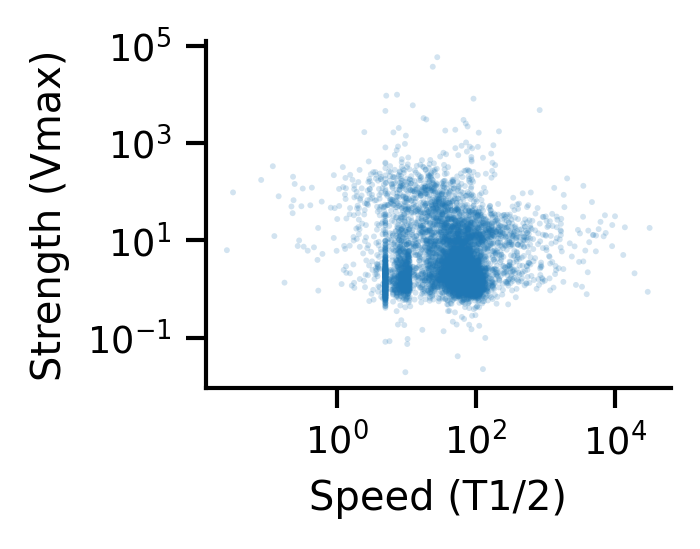

In [125]:
## ACTIVE AND INACTIVE TILES
plt.figure(dpi = 300, figsize= (2,1.5))
ax = sns.scatterplot(data=final_means_cat, 
                     x = "Lin_T1/2", y = "Vmax", alpha=0.2, s=2, edgecolor = 'none')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel("Speed (T1/2)")
ax.set_ylabel("Strength (Vmax)")
sns.despine()
